In [446]:
#Import usefull libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

In [447]:
df = pd.read_csv(join("titanic.csv") )

df.info() #show data frame info, column names, non-null cells, type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [448]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [449]:
#Conversion des maj en minuscules

df.columns = df.columns.str.lower()

#Drop useless columns from df

red_df = df.drop(columns=['passengerid','name','ticket','cabin'])

red_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [450]:
#Convert 'pclass' in columns to get 1/0 for each

red_df.pclass.unique() #show unique values


array([3, 1, 2])

In [451]:

#get_dummies 
#Each variable is converted in as many 0/1 variables as there are different values.
#Columns in the output are each named after a value
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

red_df = pd.get_dummies(red_df, columns=['pclass'])
red_df

,survived,sex,age,sibsp,parch,fare,embarked,pclass_1,pclass_2,pclass_3
0,0,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,0,1,0
887,1,female,19.0,0,0,30.0000,S,1,0,0
888,0,female,NaN,1,2,23.4500,S,0,0,1
889,1,male,26.0,0,0,30.0000,C,1,0,0


In [452]:
#Same for other columns 'sex'; sibsp'; parch; embarked;
#First check unique values

red_df.sex.unique() #show unique values

array(['male', 'female'], dtype=object)

In [453]:
red_df.sibsp.unique() #show unique values

array([1, 0, 3, 4, 2, 5, 8])

In [454]:
red_df.parch.unique() #show unique values

array([0, 1, 2, 5, 3, 4, 6])

In [455]:
red_df.embarked.unique() #show unique values


array(['S', 'C', 'Q', nan], dtype=object)

In [456]:
#some nan in embarked, must be removed ?

# show nan data summ in df, Only 2 nan in embarked, can be drop
red_df.isnull().sum()

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
pclass_1      0
pclass_2      0
pclass_3      0
dtype: int64

In [457]:
#dropna
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#remove missing values. Carefull, it's going to mevode every line with missing values, it's maybe smarter to fill the 177 "nan"
#ages with average age try "df=df.fillna(df.mean())".
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

red_df["age"] = red_df["age"].fillna(red_df["age"].mean())

red_df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
pclass_1    0
pclass_2    0
pclass_3    0
dtype: int64

In [458]:
#now we can use dropna to remove nan containing rows from the embarked column

red_df = red_df.dropna(subset=['embarked'])

red_df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
pclass_1    0
pclass_2    0
pclass_3    0
dtype: int64

In [459]:
red_df

,survived,sex,age,sibsp,parch,fare,embarked,pclass_1,pclass_2,pclass_3
0,0,male,22.000000,1,0,7.2500,S,0,0,1
1,1,female,38.000000,1,0,71.2833,C,1,0,0
2,1,female,26.000000,0,0,7.9250,S,0,0,1
3,1,female,35.000000,1,0,53.1000,S,1,0,0
4,0,male,35.000000,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,0,1,0
887,1,female,19.000000,0,0,30.0000,S,1,0,0
888,0,female,29.699118,1,2,23.4500,S,0,0,1
889,1,male,26.000000,0,0,30.0000,C,1,0,0


In [460]:
#df is now ready to get_dummies from remaining colums ("sex","sibsp","parch")
#can create a variable with column name to get all columns treated in once, it needs a "for" loop

dum_columns = (['sex','sibsp','parch','embarked'])

for n in dum_columns :
    red_df = pd.get_dummies(red_df, columns=[n])
red_df

,survived,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


2nd step training the model. Which model to choose ?

We want to predict the best condition to survive ?
Classification according to survived column

x = What we know, all information that can impact surviving
y = What we want to predict == survived

In [461]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [462]:
#First thing to do, split the data in train and test part

x = red_df.drop(columns = ['survived'])

x



,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,22.000000,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.000000,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,29.699118,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.000000,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [463]:
y = red_df['survived']

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [464]:
x_train, x_test, y_train, y_test = train_test_split(red_df.drop(columns = ['survived']), red_df['survived'], test_size=0.20, random_state=42)

x_test.columns

Index(['age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female',
       'sex_male', 'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4',
       'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1', 'parch_2', 'parch_3',
       'parch_4', 'parch_5', 'parch_6', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [465]:
x_train.shape

(711, 24)

In [466]:
# Standardized data (normaliser)
#1. StandardScaler (removing the mean and scaling to unit variance)
#2. MinMaxScaler (x-xmin)/(xmax-xmin) give scaled values btwn 1 and 0

sd_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
sd_X_train = sd_scaler.fit_transform(x_train)
mm_X_train = mm_scaler.fit_transform(x_train)
mm_X_test = mm_scaler.transform(x_test)

#fig, ax = plt.subplots(figsize=(12, 6))

#ax.plot(sd_X_train['age'], color='cyan', label='sd_train')
#ax.plot(mm_X_train['age'], color='magenta', label='sd_test')
#ax.legend();


sd_X_train

array([[-0.59963554,  2.43059683,  1.78391506, ..., -0.47747175,
        -0.31720529,  0.61908681],
       [-0.01249955, -0.35813533, -0.56056481, ...,  2.09436473,
        -0.31720529, -1.61528235],
       [ 0.16296612, -0.49094895, -0.56056481, ..., -0.47747175,
        -0.31720529,  0.61908681],
       ...,
       [ 1.38312878, -0.12471679,  1.78391506, ..., -0.47747175,
        -0.31720529,  0.61908681],
       [-0.67589571,  0.04708333, -0.56056481, ..., -0.47747175,
        -0.31720529,  0.61908681],
       [ 0.23922629, -0.47611594, -0.56056481, ..., -0.47747175,
        -0.31720529,  0.61908681]])

In [467]:
mm_X_train

array([[0.27117366, 0.2958059 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36792055, 0.02821272, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59788892, 0.05061043, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.06709553, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.40939935, 0.01689187, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [468]:
#Train the model, different solvers can be tested. 6 solvers can be used : 'liblinear', 'sag', 'saga', 'lbfgs' (default), 
#'newton-cholesky' and 'newton-cg'



In [469]:
model = LogisticRegression(max_iter = 500) #create a model
model.fit(mm_X_train, y_train) # learn
print(model.score(mm_X_train, y_train))
print(model.score(mm_X_test, y_test))

0.8115330520393812
0.8146067415730337


In [470]:
#try to change iterations value

import time # used to measure time between steps

iterations = np.arange(10, 10000, 50)

score_lbfgs = []
times_lbfgs = []

for n in iterations :
    st = time.time()
    model_lbfgs = LogisticRegression(max_iter = n) #create a model
    et = time.time()
    model_lbfgs.fit(mm_X_train, y_train) # learn
    score_lbfgs.append(model_lbfgs.score(mm_X_test, y_test))
    times_lbfgs.append(et - st)





/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [471]:
#same range of iterations value, but "liblinear" solver

iterations = np.arange(10, 10000, 50)

score_liblinear = []
times_liblinear = []

for n in iterations :
    st = time.time()
    model_liblinear = LogisticRegression(solver = "liblinear", max_iter = n) #create a model
    et = time.time()
    model_liblinear.fit(mm_X_train, y_train) # learn
    score_liblinear.append(model_liblinear.score(mm_X_test, y_test))
    times_liblinear.append(et - st)



In [472]:
#same range of iterations value, but "sag" solver


iterations = np.arange(10, 10000, 50)

score_sag = []
times_sag = []

for n in iterations :
    st = time.time()
    model_sag = LogisticRegression(solver = "sag", max_iter = n) #create a model
    et = time.time()
    model_sag.fit(mm_X_train, y_train) # learn
    score_sag.append(model_sag.score(mm_X_test, y_test))
    times_sag.append(et - st)


/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [473]:
#same range of iterations value, but "saga" solver


iterations = np.arange(10, 10000, 50)

score_saga = []
times_saga = []

for n in iterations :
    st = time.time()
    model_saga = LogisticRegression(solver = "saga", max_iter = n) #create a model
    et = time.time()
    model_saga.fit(mm_X_train, y_train) # learn
    score_saga.append(model_saga.score(mm_X_test, y_test))
    times_saga.append(et - st)



/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [474]:
#same range of iterations value, but "newton-cg" solver

iterations = np.arange(10, 10000, 50)

score_newton_cg = []
times_newton_cg = []

for n in iterations :
    st = time.time()
    model_newton_cg = LogisticRegression(solver = "newton-cg", max_iter = n) #create a model
    et = time.time()
    model_newton_cg.fit(mm_X_train, y_train) # learn
    score_newton_cg.append(model_newton_cg.score(mm_X_test, y_test))
    times_newton_cg.append(et - st)



/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'model time')

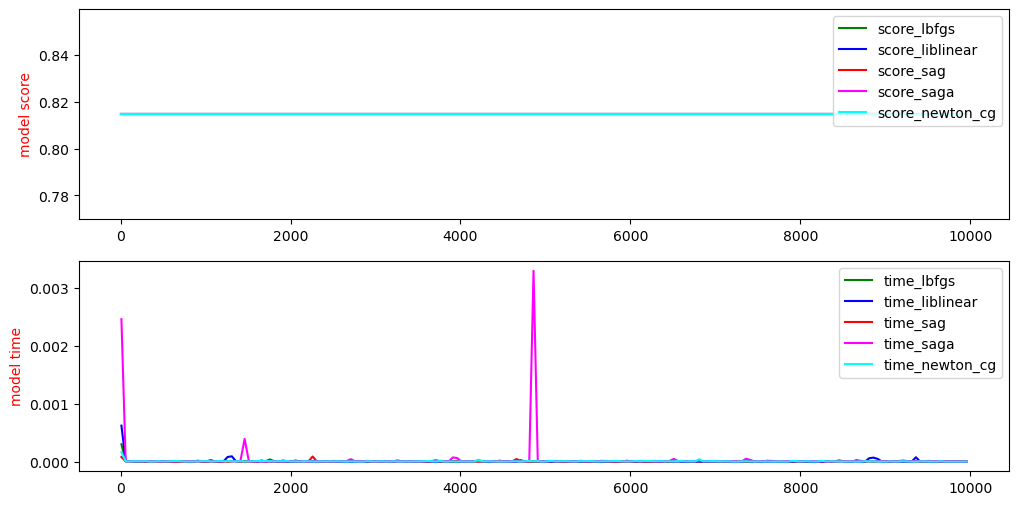

In [475]:
#plot of all scores and times to compare solvers.

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 6))

ax1.plot(iterations, score_lbfgs, color='g', label='score_lbfgs')
ax1.plot(iterations, score_liblinear, color='b', label='score_liblinear')
ax1.plot(iterations, score_sag, color='r', label='score_sag')
ax1.plot(iterations, score_saga, color='magenta', label='score_saga')
ax1.plot(iterations, score_newton_cg, color='cyan', label='score_newton_cg')
ax1.legend(loc='upper right')
ax1.set_ylabel("model score", color='red')


ax2.plot(iterations, times_lbfgs, color='g', label='time_lbfgs')
ax2.plot(iterations, times_liblinear, color='b', label='time_liblinear')
ax2.plot(iterations, times_sag, color='r', label='time_sag')
ax2.plot(iterations, times_saga, color='magenta', label='time_saga')
ax2.plot(iterations, times_newton_cg, color='cyan', label='time_newton_cg')
ax2.legend()
ax2.set_ylabel("model time", color='red')



The best scalers for this data set seems to be liblinear which is suited for small datasets. sag and saga are not suited because they are much slower and they do not reach the best scores, even after 2000 iteration, best score for sag and almost 4000 iteration, best score for saga. The 3 others best score is comparable, but liblinear is much faster and needs much less iteration to succeed.
It will be kept for final model.

In [476]:
model = LogisticRegression(solver = "liblinear", max_iter = 1000) #create a model
model.fit(mm_X_train, y_train) # learn


print(model.score(mm_X_train, y_train))
print(model.score(mm_X_test, y_test))

0.8115330520393812
0.8146067415730337


In [477]:
# Evaluate model on test sub data

scores = cross_validate(model, mm_X_test, y_test, cv=5, scoring="accuracy")
print("Accuracy on test values :", scores["test_score"].mean())

Accuracy on test values : 0.7696825396825396


In [478]:
# Finding hyperparameters
parameters = {"C": np.arange(0.1, 10, 0.1)}
grid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
grid_search.fit(mm_X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model on test sub data
print("Accuracy sur les données de test :", best_model.score(mm_X_test, y_test))

print(best_model)

Accuracy sur les données de test : 0.8146067415730337
LogisticRegression(C=1.8000000000000003, max_iter=1000, solver='liblinear')


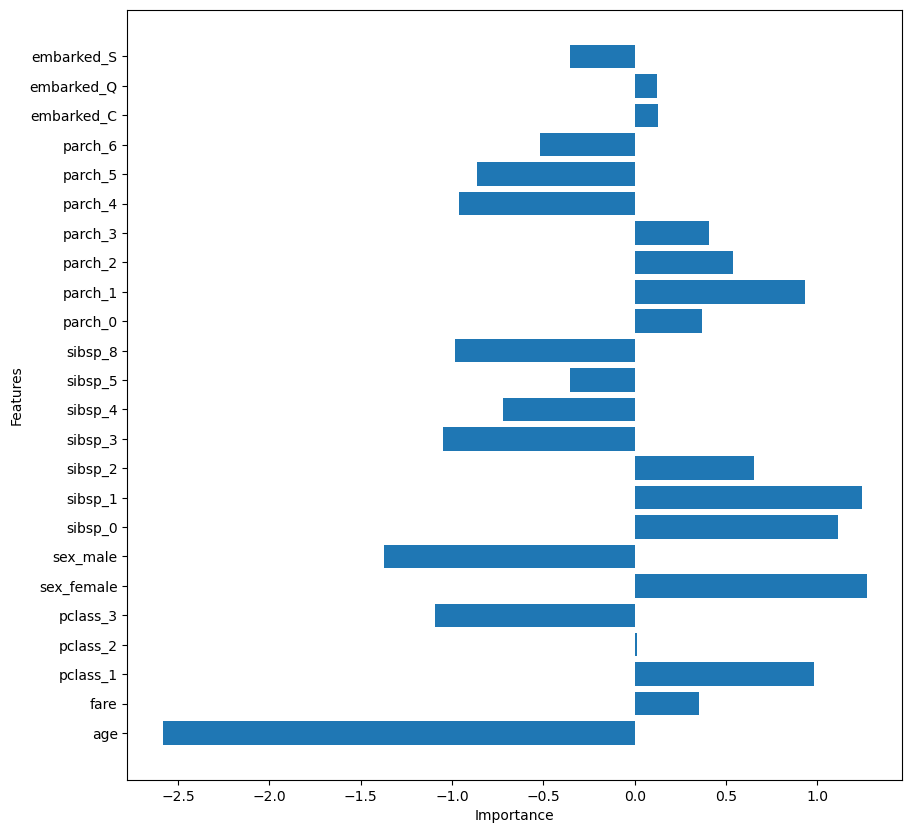

In [479]:
# features importance
feature_importances = best_model.coef_.ravel()

# features importances plot
plt.figure(figsize=(10, 10))
plt.barh(red_df.drop(columns=["survived"]).columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

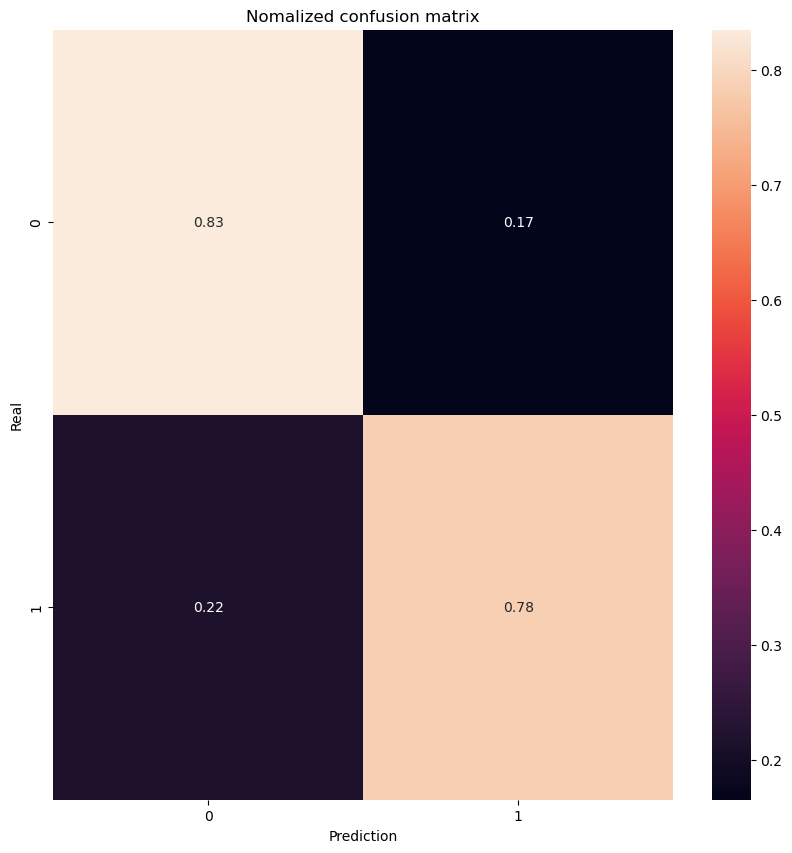

In [480]:
# Prédictions sur les données de test
y_pred = best_model.predict(mm_X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normaliser la matrice de confusion
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Afficher la matrice de confusion sous forme de heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", ax=ax)
plt.title("Nomalized confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

In [481]:
# Calculer le rapport de classification
report = classification_report(y_test, y_pred, target_names=["Survived", "Non-survived"])

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

    Survived       0.86      0.83      0.85       109
Non-survived       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [491]:





model_LR = LogisticRegression(max_iter = 1000) #create a model
model_LR.fit(mm_X_train, y_train) # learn

y_LR = model_LR.predict(mm_X_test)
    

In [492]:
# On teste d'autre model. 1. SVC

from sklearn.svm import SVC


model_svc = SVC(gamma = 'auto') #create a model
model_svc.fit(mm_X_train, y_train) # learn

y_svc = model_svc.predict(mm_X_test)


In [493]:
# On teste d'autre model. 2. perceptron

from sklearn.linear_model import Perceptron


model_percept = Perceptron(tol=1e-3, random_state=0) #create a model
model_percept.fit(mm_X_train, y_train) # learn

y_percept = model_percept.predict(mm_X_test)


In [494]:
# Calculer le rapport de classification

model_t = (model, model_svc, model_percept)


report_LR = classification_report(y_test, y_LR, target_names=["Survived", "Non-survived"], output_dict=True)
report_svc = classification_report(y_test, y_svc, target_names=["Survived", "Non-survived"], output_dict=True)
report_percept = classification_report(y_test, y_percept, target_names=["Survived", "Non-survived"], output_dict=True)





df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVC', 'Perceptron'],
    'Precision': [report_LR['Survived']['precision'], report_svc['Survived']['precision'], report_percept['Survived']['precision']],
    'Recall' : [report_LR['Survived']['recall'], report_svc['Survived']['recall'], report_percept['Survived']['recall']],
    'f1-score' : [report_LR['Survived']['f1-score'], report_svc['Survived']['f1-score'], report_percept['Survived']['f1-score']],
    'Accuracy' : [report_LR['accuracy'], report_svc['accuracy'], report_percept['accuracy']]
})

df = df.style.highlight_max(color = 'pink', axis = 0)

df



,Model,Precision,Recall,f1-score,Accuracy
0,Linear Regression,0.858491,0.834862,0.846512,0.814607
1,SVC,0.847619,0.816514,0.831776,0.797753
2,Perceptron,0.782946,0.926606,0.848739,0.797753


In [486]:
report_LR = classification_report(y_test, y_LR, target_names=["Survived", "Non-survived"])
report_svc = classification_report(y_test, y_svc, target_names=["Survived", "Non-survived"])
report_percept = classification_report(y_test, y_percept, target_names=["Survived", "Non-survived"])

print(report_LR)
print(report_svc)
print(report_percept)

              precision    recall  f1-score   support

    Survived       0.78      0.93      0.85       109
Non-survived       0.84      0.59      0.69        69

    accuracy                           0.80       178
   macro avg       0.81      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178

              precision    recall  f1-score   support

    Survived       0.85      0.82      0.83       109
Non-survived       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

              precision    recall  f1-score   support

    Survived       0.78      0.93      0.85       109
Non-survived       0.84      0.59      0.69        69

    accuracy                           0.80       178
   macro avg       0.81      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178

